In [2]:
import pandas as pd
import numpy as np


data = pd.read_csv('mock.csv', index_col=0)
data.head(5)


,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29
0,80.441978,62.763602,46.912796,17.580598,52.616476,27.273486,45.852003,73.859295,54.744797,55.466211,...,7.532072,66.606436,25.664053,11.342042,28.496017,62.325849,7.751877,16.470458,43.255854,32.287479
1,86.582611,40.565604,5.679506,55.310499,48.617762,68.597021,78.749153,30.474890,50.820144,61.871157,...,71.246046,10.027910,5.469935,98.917358,4.772704,13.869977,76.775269,11.431314,44.411419,27.382909
2,46.019533,36.964991,43.933518,85.964729,78.744218,95.297508,63.415360,49.363625,10.052787,15.083001,...,84.230967,73.464192,57.105107,42.629837,7.734132,61.016087,58.991457,7.145256,18.528688,3.581934
3,10.668664,83.911419,52.692502,56.944824,1.677418,51.674069,30.705785,34.616540,53.767324,37.127162,...,14.633843,30.518043,95.431710,59.699177,52.590386,34.668828,13.619766,22.576324,45.677178,21.886245
4,57.050255,76.947848,36.995940,19.009419,10.925758,13.972232,43.662098,87.189719,73.534504,53.009632,...,53.168105,25.025920,81.271882,97.594336,10.624934,26.451923,75.859308,95.048781,67.369004,18.778430


### Random w

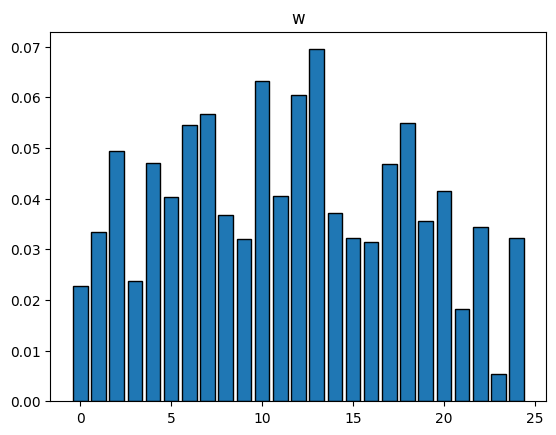

In [3]:
# normal distribution with noise
def get_normal_w(n_assets):
    x = np.linspace(-3, 3, n_assets)
    # 25 bins, normal distribution from -3 to 3
    pdf = np.exp(-0.5 * x**2)
    # add noise
    pdf += np.random.rand(n_assets)*2.0
    return pdf/np.sum(pdf)

def get_random_w(n_assets):
    return np.random.dirichlet(np.ones(n_assets))

import matplotlib.pyplot as plt
weights = get_normal_w(25)
plt.bar(np.arange(len(weights)), weights, edgecolor='k')
plt.title("w")
plt.show()

In [10]:
# calculates the annualized return of a portfolio from the selected assets
# assets -> names of the assets in the df
# w -> percentage allocated into each one
# data -> dataframe for the assets
# rfr -> risk free rate
def get_sharpe(assets,w,rfr,data):
    assets = data.loc[:,assets]
    #r = row[i+1] - row[i]
    daily_ret = (assets - assets.shift(-1)).dropna()
    weighted_rets = daily_ret @ w 
    # drop last (nan)
    mean_daily_rets = weighted_rets.mean()
    std_daily_rets = weighted_rets.std()

    #annualizing
    annualized_ret = mean_daily_rets * 252
    annualized_std = std_daily_rets * np.sqrt(252)

    return (annualized_ret - rfr)/ annualized_std


w = get_random_w(25)
assets = data.columns[0:25]

get_sharpe(assets,w,0.0,data)

0.026841715397027167

## Simple model: no paralelization

In [11]:
import itertools
from tqdm import tqdm
# get all combinations of assets
#   for each combination, sample 1000 random w
#      for each w calculate and store sharpe

n_assets = 25
best = ([],0,0)
max_sharpe = -1000000
asset_combinations = list(itertools.combinations(data.columns,n_assets))
for combo in tqdm(asset_combinations): 
    for i in range(0,1000):
        w = get_random_w(n_assets)
        sharpe = get_sharpe(combo,w,0.0,data)
        if sharpe > max_sharpe:
            max_sharpe = sharpe
            best = (combo,w,sharpe)

print(best) 


  0%|          | 0/142506 [00:00<?, ?it/s]

  0%|          | 51/142506 [00:43<33:40:52,  1.17it/s]


KeyboardInterrupt: 